In [142]:
# Import Libraries
import pandas as pd

# Loading the dataset
This dataset comes from the Kaggle website, and can be found here: <https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/>

It shows examples of credit card customers with various attributes such as age, activity, credit, etc. 

In [143]:
# Load the dataset
churn = pd.read_csv("churn_data.csv")

# Processing the dataset
Firstly, the last two columns of data need to be removed from the datast as they were published in error as mentioned by the dataset's author.

Secondly, the churn column of the dataset needs to be encoded as a numeric value of `0 = Existing Customer` and `1 = Churned Customer`, we'll call this column `Churned`

In [144]:
# Remove last two columns
churn = churn.iloc[:, :-2]

In [145]:
# Encode the Churn Column
encode = {"Existing Customer": 0, "Attrited Customer": 1}
churn["Churned"] = list(map(lambda x: encode[x], churn["Attrition_Flag"]))

# Analyzing the Features
We need to determine which features should be included within our classification model

In [146]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np

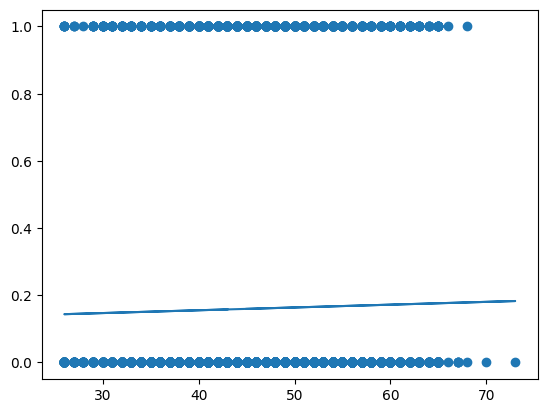

In [147]:
# Determine input and output variables
x = churn["Customer_Age"]
y = churn["Churned"]

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

plt.show()

In [148]:
# Categorize columns on data type
continuous_columns    = ["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal",
                         "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct",
                         "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

discrete_features    = ["Dependent_count", "Income_Category", "Total_Relationship_Count",
                        "Months_Inactive_12_mon", "Contacts_Count_12_mon"]

nominal_features     = ["Gender", "Marital_Status", "Education_Level", "Card_Category"]

target               = ["Churned"]
                        
churn[output_feature]

,Churned
0,0
1,0
2,0
3,0
4,0
...,...
10122,0
10123,1
10124,1
10125,1


Months_on_book
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


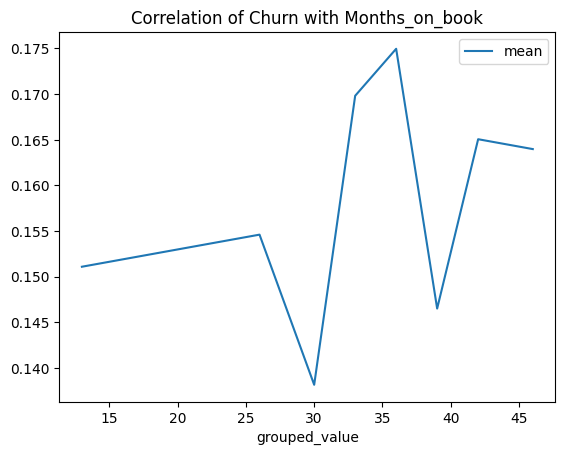

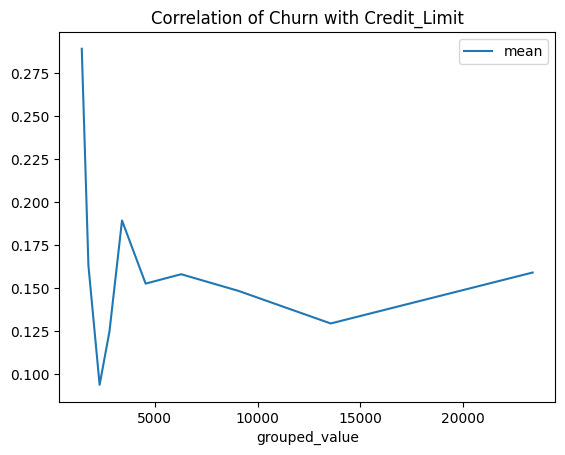

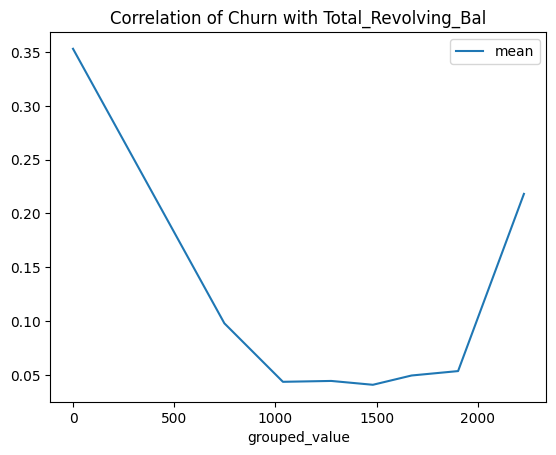

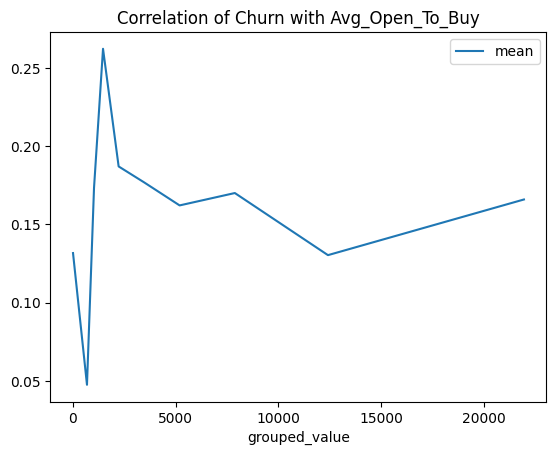

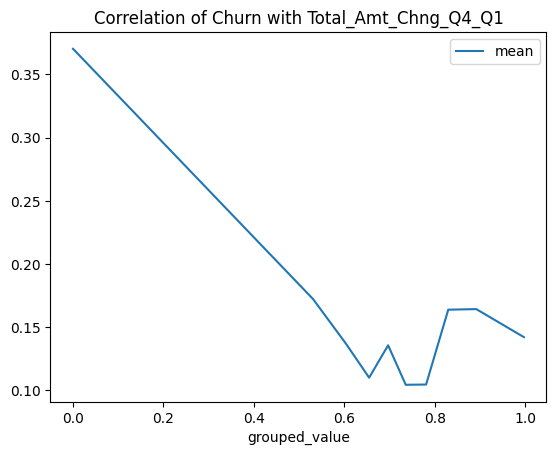

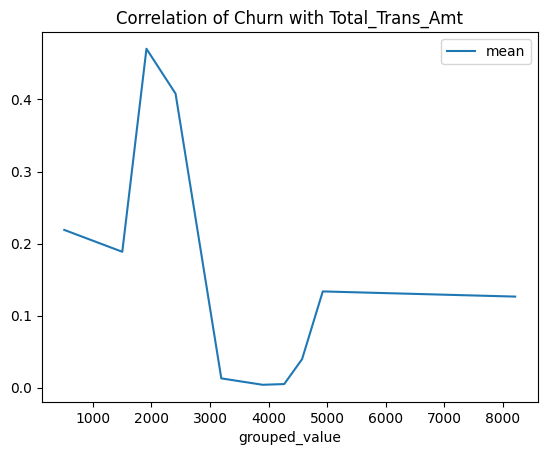

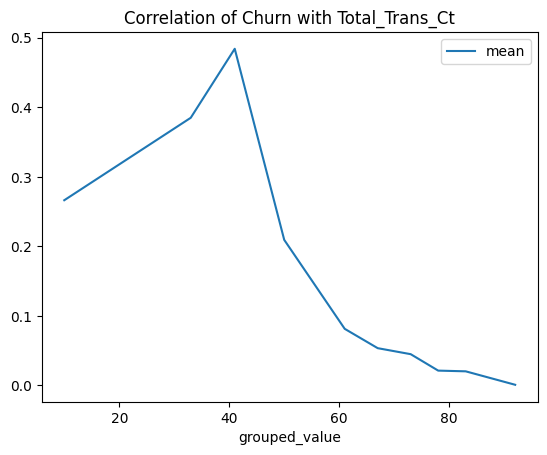

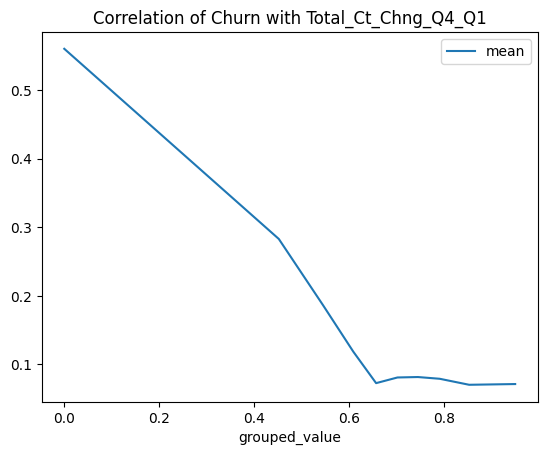

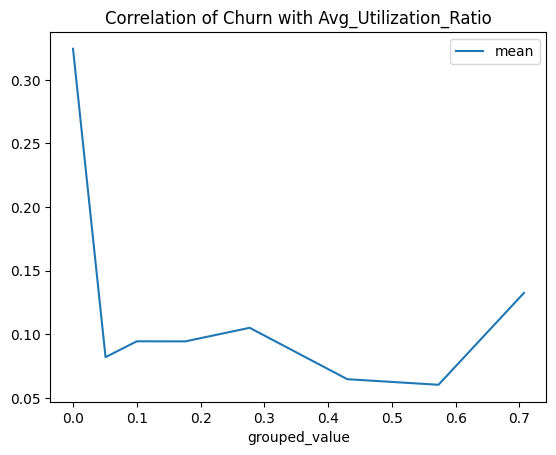

In [152]:
for colname in continuous_columns[1:]:
    print(colname)
    # Bin Columns into 10 equal sized bins
    cuts, bins = pd.qcut(churn[colname], 10, labels=False, retbins=True, duplicates='drop')
    group = list(map(lambda i: bins[i], cuts))

    # Plot Average Churn over each Bin
    df = pd.DataFrame({"grouped_value": group, "churn": churn["Churned"]})
    df = df.groupby("grouped_value")["churn"].agg([('mean','mean')]).reset_index()
    df.plot(x="grouped_value", y="mean", kind="line", title="Correlation of Churn with {0}".format(colname))

   Customer_Age_Gr      mean
0             26.0  0.128070
1             36.0  0.147321
2             39.0  0.173242
3             42.0  0.173690
4             44.0  0.164959
5             46.0  0.169295
6             48.0  0.154647
7             51.0  0.153342
8             53.0  0.183007
9             57.0  0.159574


<Axes: xlabel='Customer_Age_Gr'>

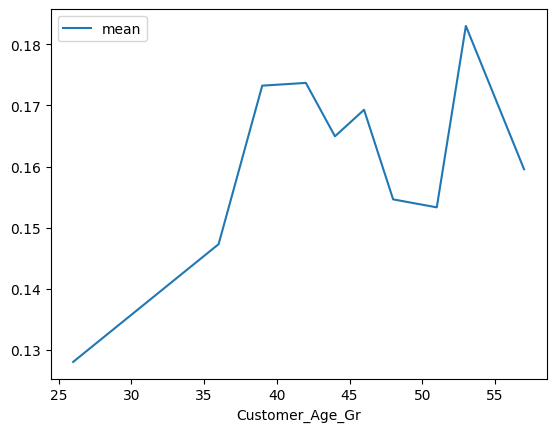

In [71]:
# Determine input and output variables
x = churn["Customer_Age_Gr"]
y = churn["Churned"]

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

plt.show()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned,Customer_Age_Gr
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0,26.0
13,816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,...,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195,0,26.0
260,788950158,Existing Customer,36,M,2,College,Unknown,$80K - $120K,Blue,22,...,34516.0,1652,32864.0,0.854,1283,39,1.294,0.048,0,26.0
304,717401883,Existing Customer,35,M,3,Uneducated,Married,$60K - $80K,Blue,22,...,6985.0,1130,5855.0,0.963,1694,44,0.760,0.162,0,26.0
306,710572458,Existing Customer,36,F,3,High School,Married,Unknown,Blue,24,...,15439.0,0,15439.0,0.742,2069,43,0.536,0.000,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,720608658,Existing Customer,33,F,1,Uneducated,Single,Less than $40K,Blue,36,...,8398.0,1875,6523.0,0.727,16706,123,0.757,0.223,0,26.0
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,...,34516.0,0,34516.0,1.004,9338,73,0.622,0.000,1,26.0
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,...,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189,1,26.0
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than $40K,Blue,15,...,4700.0,0,4700.0,0.617,14723,96,0.655,0.000,0,26.0


In [32]:
churn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.160660
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [47]:
churn[["Customer_Age", "Customer_Age_Gr"]]

,Customer_Age,Customer_Age_Gr
0,45,49.5
1,49,49.5
2,51,54.2
3,40,40.1
4,40,40.1
...,...,...
10122,50,54.2
10123,41,44.8
10124,44,44.8
10125,30,30.7
